In [1]:
import urllib.request
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# keras指定運行時顯卡及限制GPU用量
import os
import keras.backend.tensorflow_backend as KTF
from tensorflow.python.client import device_lib
import tensorflow as tf

import ML
ML.init()
Sess = ML.limitGPUByGrowth()
# 设置session
KTF.set_session(Sess)

E:\Program\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
E:\Program\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
E:\Program\Anaconda3\envs\tensorflow\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
E:\Program\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


/device:CPU:0
/device:GPU:0
Start using first GPU


In [2]:
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
(x_train_img, y_train_label), \
(x_test_img, y_test_label) = cifar10.load_data()

In [3]:
print('Train data',x_train_img.shape,',Train Label',y_train_label.shape)
print('Train data',x_test_img.shape,',Test Label',y_test_label.shape)

Train data (50000, 32, 32, 3) ,Train Label (50000, 1)
Train data (10000, 32, 32, 3) ,Test Label (10000, 1)


In [4]:
label_dict={0:'airplane',
           1:'automible',
           2:'bird',
           3:'cat',
           4:'deer',
           5:'dog',
           6:'frog',
           7:'hourse',
           8:'ship',
           9:'truck'}

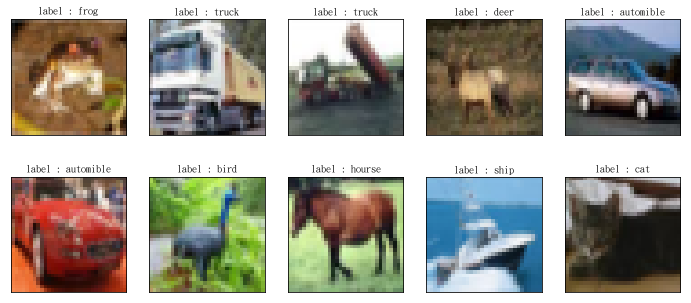

In [5]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14) #設定顯示圖形大小
    if num>25: num =25 #顯示的資料筆數，上限為25
    for i in range(0,num):
        ax =plt.subplot(5,5,1+i) #建立子圖形有五行五列
        ax.imshow(images[idx], cmap='binary')
        title = "label : " + str(label_dict[labels[idx][0]]) #建立子圖形title之標籤欄位
        if len(prediction)>0: #假如有傳入預測結果
            title += ", predict=" + str(label_dict[prediction[idx]]) #子圖形title加入預測結果
        ax.set_title(title,fontsize=10) #設定子圖形的標題title與大小
        ax.set_xticks([]); ax.set_yticks([]) #設定不顯示刻度
        idx+=1 #讀取下一筆
    plt.show()
plot_images_labels_prediction(x_train_img,y_train_label,[],0)

In [6]:
x_train_img[0][0][0] #查看訓練資料影像的第1個點

array([59, 62, 63], dtype=uint8)

In [7]:
# 訓練資料標準化 (本身已為4D矩陣)
x_train_img_normalize = x_train_img.astype('float32') / 255.0
x_test_img_normalize = x_test_img.astype('float32') / 255.0

In [8]:
x_train_img_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [9]:
# 針對Label做OneHotEncode
from keras.utils import np_utils
y_train_OneHot = np_utils.to_categorical(y_train_label)
y_test_OneHot = np_utils.to_categorical(y_test_label)

In [10]:
print(y_train_OneHot.shape)
y_train_OneHot[:5] #前5筆測試資料對應label

(50000, 10)


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.models import load_model 

def model_create():
    model = Sequential()

    #建立卷積層1-0
    model.add(Conv2D(filters=32,
                     kernel_size=(3,3),
                     input_shape=(32,32,3),
                     activation='relu',
                     padding='same'))

    #隨機捨棄30%的神經元 (update)
    model.add(Dropout(0.3))

    #建立卷積層1-1
    model.add(Conv2D(filters=32,
                     kernel_size=(3,3),                
                     activation='relu',
                     padding='same'))

    #建立池化層1
    model.add(MaxPooling2D(pool_size=(2,2)))

    #建立卷積層2-0
    model.add(Conv2D(filters=64,
                     kernel_size=(3,3),
                     activation='relu',
                     padding='same'))
    #隨機捨棄30%的神經元 (update)
    model.add(Dropout(0.3))

    #建立卷積層2-1
    model.add(Conv2D(filters=64,
                     kernel_size=(3,3),                
                     activation='relu',
                     padding='same'))

    #建立池化層2
    model.add(MaxPooling2D(pool_size=(2,2)))

    #建立卷積層3-0
    model.add(Conv2D(filters=128,
                     kernel_size=(3,3),
                     activation='relu',
                     padding='same'))
    #隨機捨棄30%的神經元 (update)
    model.add(Dropout(0.3))

    #建立卷積層3-1
    model.add(Conv2D(filters=128,
                     kernel_size=(3,3),                
                     activation='relu',
                     padding='same'))

    #建立池化層3
    model.add(MaxPooling2D(pool_size=(2,2)))

#     #建立卷積層4-0
#     model.add(Conv2D(filters=256,
#                      kernel_size=(3,3),
#                      activation='relu',
#                      padding='same'))
#     #隨機捨棄30%的神經元 (update)
#     model.add(Dropout(0.3))

#     #建立卷積層4-1
#     model.add(Conv2D(filters=256,
#                      kernel_size=(3,3),                
#                      activation='relu',
#                      padding='same'))
#     #建立池化層4
#     model.add(MaxPooling2D(pool_size=(2,2)))  #val_acc: 0.7713   

    #建立平坦層
    model.add(Flatten())
    #隨機捨棄30%的神經元 (update)
    model.add(Dropout(0.3))
    #建立隱藏層1(2500 nuero)
    model.add(Dense(2500,activation='relu'))
    #隨機捨棄30%的神經元 (update)
    model.add(Dropout(0.3))
    #建立隱藏層2(1500 nuero)
    model.add(Dense(1500,activation='relu'))
    #隨機捨棄30%的神經元 (update)
    model.add(Dropout(0.3))
#     #建立隱藏層3(500 nuero)
#     model.add(Dense(500,activation='relu'))
#     #隨機捨棄30%的神經元 (update)
#     model.add(Dropout(0.1)) #val_acc: 0.7713
    model.add(Dense(10,activation='softmax'))
    print(model.summary())
    # 模行訓練方式設定
    model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
    # 儲存model
    model.save('E:/WorkSpace/TensorFlowWorkSpace/running_data/Saved_model/cifarCnnModel.h5') 
    return model

In [16]:
try:
    model = load_model('E:/WorkSpace/TensorFlowWorkSpace/running_data/Saved_model/cifarCnnModel.h5')
except:
    model = model_create()

In [17]:
for i in range(0,1):
    try:
        model.load_weights("E:/WorkSpace/TensorFlowWorkSpace/running_data/Saved_model/cifarCnnWeight.h5") #載入權重
        print('載入weight成功')
    except:
        print('載入weight失敗!開始訓練新模型')
    train_history = model.fit(x_train_img_normalize,
                          y_train_OneHot,
                          validation_split=0.2,
                          epochs=10, #Update to 50執行周期
                          batch_size=128,
                          verbose=2)
#     train_history = temp_history
    model.save_weights('E:/WorkSpace/TensorFlowWorkSpace/running_data/Saved_model/cifarCnnWeight.h5') #儲存權重
    print('儲存weight')




載入weight成功
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 26s - loss: 0.5017 - acc: 0.8219 - val_loss: 0.6365 - val_acc: 0.7858
Epoch 2/10
 - 21s - loss: 0.4911 - acc: 0.8265 - val_loss: 0.6518 - val_acc: 0.7794
Epoch 3/10
 - 22s - loss: 0.4660 - acc: 0.8326 - val_loss: 0.6327 - val_acc: 0.7853
Epoch 4/10
 - 21s - loss: 0.4340 - acc: 0.8470 - val_loss: 0.6206 - val_acc: 0.7923
Epoch 5/10
 - 22s - loss: 0.4371 - acc: 0.8438 - val_loss: 0.6368 - val_acc: 0.7857
Epoch 6/10
 - 22s - loss: 0.4155 - acc: 0.8525 - val_loss: 0.6523 - val_acc: 0.7832
Epoch 7/10
 - 22s - loss: 0.4040 - acc: 0.8557 - val_loss: 0.6594 - val_acc: 0.7817
Epoch 8/10
 - 21s - loss: 0.3935 - acc: 0.8604 - val_loss: 0.6509 - val_acc: 0.7870
Epoch 9/10
 - 21s - loss: 0.3739 - acc: 0.8655 - val_loss: 0.6415 - val_acc: 0.7911
Epoch 10/10
 - 21s - loss: 0.3624 - acc: 0.8713 - val_loss: 0.6772 - val_acc: 0.7843
儲存weight


In [18]:
scores = model.evaluate(x_test_img_normalize,y_test_OneHot,verbose=0)
scores[1]

0.7851

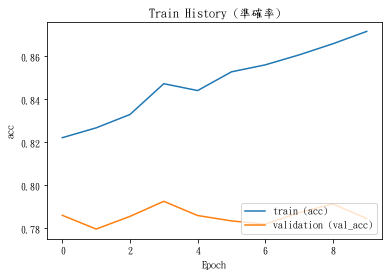

In [19]:
def show_train_history(train_history,train,validation,title):
    plt.plot(train_history.history[train]) #acc
    plt.plot(train_history.history[validation]) #val_acc
    plt.title('Train History ('+ title + ')')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train (acc)','validation (val_acc)'],
    loc='lower right')
show_train_history(train_history,'acc','val_acc','準確率')

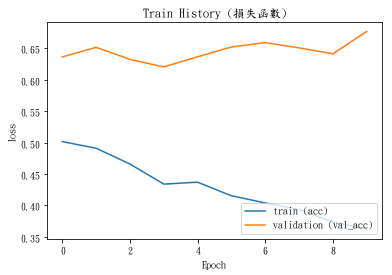

In [20]:
show_train_history(train_history,'loss','val_loss','損失函數')

In [21]:
# 評估模型準確綠
scores = model.evaluate(x_test_img_normalize,
               y_test_OneHot,
               verbose=0)
scores[1]

0.7851

In [22]:
# 執行預測
prediction = model.predict_classes(x_test_img_normalize)
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 9], dtype=int64)

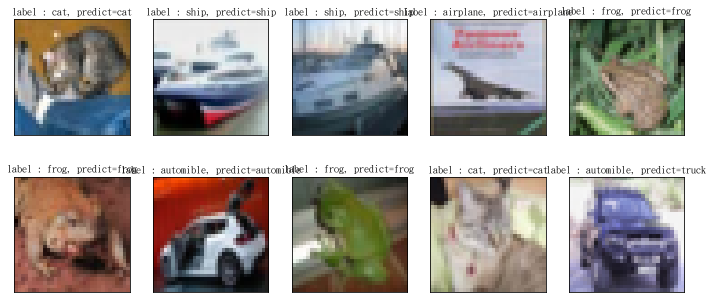

In [23]:
# 查看前10張預測結果
plot_images_labels_prediction(x_test_img,
                              y_test_label,
                              prediction,0,10)

In [24]:
# 使用標準化後的測試資料取得預測機率
Predicted_Proability = model.predict(x_test_img_normalize)
Predicted_Proability.shape # D-1:資料數 , D-2:Label數 
# Predicted_Proability[i][label] = 第i筆測試資料，預測為label的機率

(10000, 10)

label: cat


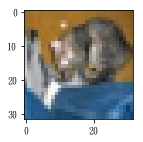

airplane Probability:0.000650367
automible Probability:0.001525534
bird Probability:0.003997393
cat Probability:0.761673927
deer Probability:0.001321943
dog Probability:0.094349653
frog Probability:0.126379415
hourse Probability:0.000822409
ship Probability:0.002648550
truck Probability:0.006630750
label: ship


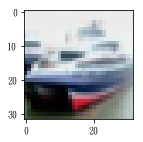

airplane Probability:0.008911419
automible Probability:0.001044977
bird Probability:0.000000208
cat Probability:0.000073360
deer Probability:0.000000001
dog Probability:0.000000044
frog Probability:0.000002866
hourse Probability:0.000000002
ship Probability:0.989953756
truck Probability:0.000013322


In [25]:
def show_Predicted_Proability(y, # y :真實結果
                              prediction, # prediction 預測結果
                              x_img, # x_img 預測影像
                              Predicted_Proability, # 預測機率
                              idx): # idx 真實結果資料索引
    print('label:',label_dict[y[idx][0]]) # y[idx][0] : 真實結果Label編號
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_test_img[idx],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Proability[idx][j])) 

# 查看前2筆照片的預測機率
for i in range(0,2):
    show_Predicted_Proability(y_test_label,
                  prediction,
                  x_test_img,
                  Predicted_Proability,i)

In [26]:
print(label_dict)
pd.crosstab(y_test_label.reshape(-1),
            prediction,rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automible', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'hourse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,860,1,32,7,10,0,6,15,61,8
1,30,873,3,12,4,3,7,5,28,35
2,72,0,741,33,67,21,38,15,12,1
3,33,0,91,594,51,76,81,51,16,7
4,23,1,64,47,770,8,38,40,8,1
5,12,0,72,175,50,582,37,65,5,2
6,7,1,56,34,26,5,852,4,14,1
7,12,0,35,34,54,21,4,836,1,3
8,46,5,13,7,6,3,3,5,903,9


      label  predict
4750      7        9
4926      7        9
9587      7        9


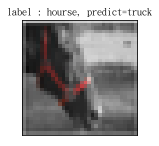

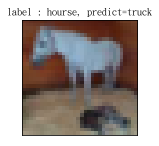

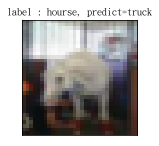

In [27]:
#建立真實值&預測DataFrame
df = pd.DataFrame({'label':y_test_label.reshape(-1),'predict':prediction})
temp_df = df[(df.label==7)&(df.predict==9)]
print(temp_df)
error_list = temp_df.index.tolist()
for index,item in enumerate(error_list):
    plot_images_labels_prediction(x_test_img,
                              y_test_label,
                              prediction,item,num=1)